In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

# Step 2: Load the dataset
data = pd.read_csv("C://Users//Manisha Chandanshiv//OneDrive//ドキュメント//Excelr assignment Questions//Data Science//KNN//KNN//Zoo.csv")


  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  


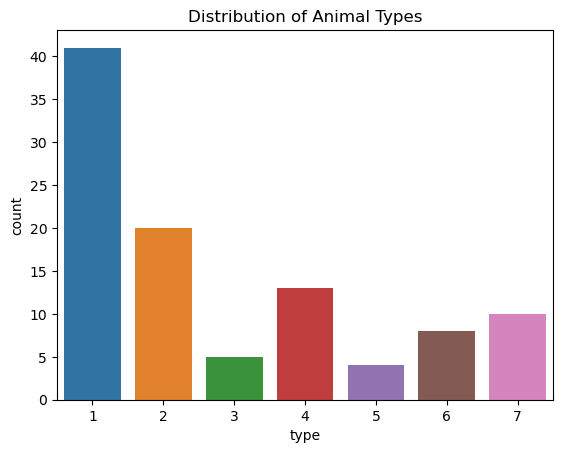

In [3]:
print(data.head())

# Visualize the distribution of different animal types
sns.countplot(x='type', data=data)
plt.title('Distribution of Animal Types')
plt.show()

In [4]:
print(data.isnull().sum())
data.fillna(data.mean(), inplace=True)

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


C:\Users\Manisha Chandanshiv\AppData\Local\Temp\ipykernel_17972\251390840.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


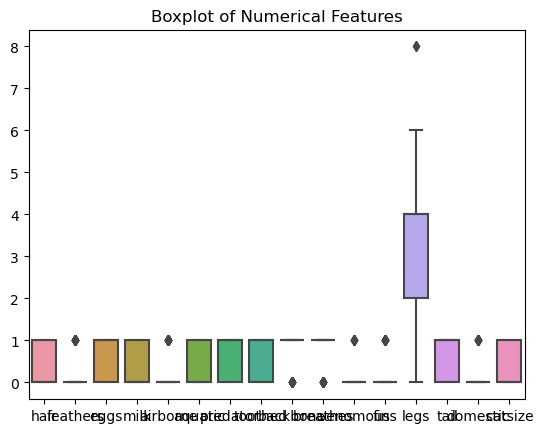

In [5]:
sns.boxplot(data=data.drop(columns=['animal name', 'type']))  # Exclude non-numeric columns
plt.title('Boxplot of Numerical Features')
plt.show()


In [7]:
X = data.drop(columns=['animal name', 'type'])
y = data['type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
y_pred = knn.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1-Score: 0.9333333333333333


C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


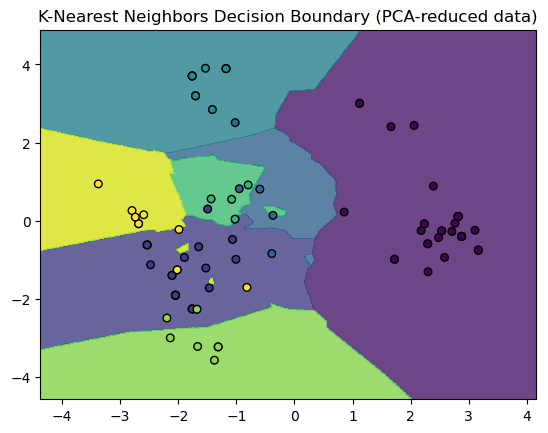

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=k)
knn_pca.fit(X_pca, y)

h = .02 
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', s=30)
plt.title('K-Nearest Neighbors Decision Boundary (PCA-reduced data)')
plt.show()

# Interview Question and Answers

#### What are the key hyperparameters in KNN?

The key hyperparameters in K-Nearest Neighbors (KNN) include the number of neighbors (k), which determines how many nearest points influence the prediction. Choosing the right k is important because a small value can make the model sensitive to noise, while a large value may oversmooth important patterns. Other hyperparameters include the distance metric used to measure similarity between points, the weighting function (whether neighbors contribute equally or weighted by distance), and the algorithm used for neighbor searches (such as brute force or KD-tree), which affects computational efficiency.

#### What distance metrics can be used in KNN?

KNN commonly uses several distance metrics depending on the data type and problem. Euclidean distance measures the straight-line distance between points and is popular for continuous variables. Manhattan distance sums the absolute differences along each dimension and can be more robust in some contexts. Minkowski distance generalizes both Euclidean and Manhattan distances. For specialized data, metrics like cosine similarity (which measures the angle between vectors) can be used, especially in text or high-dimensional spaces. The choice of distance metric impacts how neighbors are identified and thus influences model performance.